In [1]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt


from utils import *
from network import *

In [2]:
state = torch.load('./model/model.pth',map_location='cpu')

In [3]:
model = U_Net(1,1)

In [4]:
model.load_state_dict(state['net'])

<All keys matched successfully>

In [5]:
dataset = ReadData()

In [6]:
sample = dataset.image_data[0]
GT = dataset.mask_data[0]

In [7]:
del dataset,state

In [10]:
data = torch.Tensor(sample/255.).unsqueeze(0).unsqueeze(0)

In [11]:
model.eval()
with torch.no_grad():
    prediction = model(data)

In [13]:
output = prediction.data.numpy().squeeze()

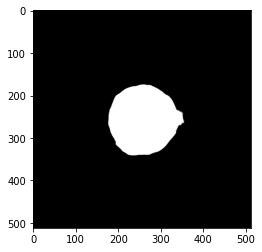

In [14]:
plt.imshow(output,cmap='gray')

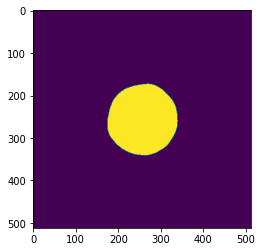

In [15]:
plt.imshow(GT)

In [18]:
score = IOU(output,GT/255.)

In [19]:
output[output>=0.5] = 1
output[output<0.5] = 0

In [20]:
GT[GT==255]=1
GT[GT==0]=0

In [21]:
score = IOU(output,GT)

In [56]:
import cv2

In [62]:
contours,_ = cv2.findContours(np.array(output,dtype=np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [59]:
output[output==1]=255


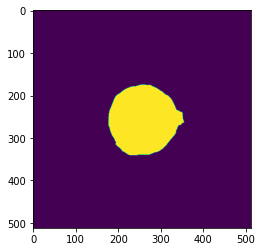

In [60]:
plt.imshow(output)

In [67]:
pos = contours[0].squeeze()

In [75]:
pos_new = np.append(pos,pos[0].reshape(1,-1),axis=0)

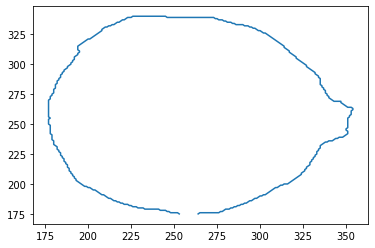

In [77]:

plt.plot(pos[:,0],pos[:,1],'-')